In [55]:
import os
from os.path import join as oj
import sys, time
sys.path.insert(1, oj(sys.path[0], '..'))  # insert parent path
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from copy import deepcopy
import pickle as pkl
import pandas as pd
from os.path import join
import torch
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from os.path import join as oj
import torch.utils.data as utils
from torchvision import datasets, transforms
import numpy as np
import os
import sys
pd.set_option('precision', 3)

In [113]:
save_path = "../results_for_export"
trained_model_folder = '../MNIST_results/'
fnames = sorted([oj(trained_model_folder, fname) for fname in os.listdir(trained_model_folder) if 'block' not in fname]) 
# other models were trained badly

results_list = [pd.Series(pkl.load(open(fname, "rb"))) for fname in (fnames)] 
results = pd.concat(results_list, axis=1).T.infer_objects() 
results['final_acc'] = [max(x) for x in results['accs_test']] 

/home/lauri/.conda/envs/gpu_usage/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [114]:
results = results[results.method != 'CD_Omvendt' ]

In [115]:
len(results)

77

In [116]:
results['final_acc'] = [x[-1] for x in results['accs_test']] 
results['final_acc_train'] = [max(x) for x in results['accs_train']]


results['final_cd'] = [x[-1] for x in results['cd']]
results['final_test_loss'] = [x[-1] for x in results['losses_test']]


results['final_train_loss'] = [min(x) for x in results['losses_train']]
results['acc_color'] = [0 for x in results['accs_train']]
if not 'method' in list(results.columns):
    results['method'] = ['CD' for x in results['accs_train']]
if not 'method' in list(results.columns):
    results['method'] = ['CD' for x in results['accs_train']]

In [117]:
results = results.dropna()

results.reset_index(drop=True, inplace=True)
results_save = results[['regularizer_rate','final_acc','final_acc_train','final_test_loss', 'acc_color','final_cd', 'method']].sort_values(by = ['regularizer_rate'])

In [118]:
results_save

,regularizer_rate,final_acc,final_acc_train,final_test_loss,acc_color,final_cd,method
33,0.0,73.79,100.000,1.118,0,0.000e+00,ExpectedGrad
61,0.0,70.52,100.000,1.592,0,0.000e+00,ExpectedGrad
7,0.0,65.15,100.000,2.127,0,0.000e+00,ExpectedGrad
45,0.1,62.44,100.000,2.744,0,1.090e-03,CD
57,0.1,61.78,100.000,2.275,0,7.152e-06,Grad
36,0.1,70.14,100.000,1.592,0,7.907e-04,CD
20,0.1,61.82,100.000,2.871,0,2.807e-04,CD
17,0.1,97.89,99.609,0.067,0,6.208e-02,ExpectedGrad
31,0.1,62.82,100.000,2.118,0,2.175e-06,Grad
11,0.1,98.44,99.609,0.047,0,6.688e-02,ExpectedGrad


In [119]:
concise_results = results_save.groupby(by = ['method','regularizer_rate']).mean()
concise_results.columns = ['Test accuracy', 'Train accuracy', 'Test loss', 'Color accuracy', 'CD']
# with open(oj(save_path, "color_mnist.text"), 'w') as f:
#           f.write(concise_results.to_latex())

In [120]:
concise_results_for_save = concise_results[['Test accuracy']]#, 'Color accuracy']]

In [121]:
concise_results_for_save

Test accuracy
method       regularizer_rate               
CD           0.1                      64.800
             1.0                      71.710
             10.0                     77.258
             100.0                    89.820
             1000.0                   97.977
             10000.0                  97.412
             100000.0                 96.068
ExpectedGrad 0.0                      69.820
             0.1                      98.165
             10.0                     97.880
             100.0                    88.703
             1000.0                    9.983
             10000.0                   9.973
             100000.0                  9.973
Grad         0.1                      61.527
             1.0                      56.160
             10.0                     56.217
             100.0                    73.987
             1000.0                   98.927
             10000.0                  99.200
             100000.0                 99.080

In [80]:
len(results)

20

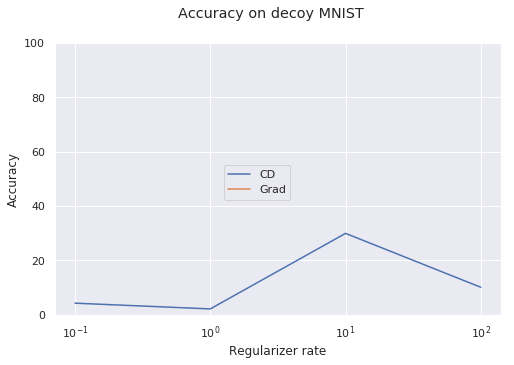

In [66]:
sns.set()
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(results_save[results_save.method == 'CD'].groupby(by = ['regularizer_rate']).mean()[ 'final_acc'], label = 'CD')
ax.plot(results_save[results_save.method == 'Grad'].groupby(by = ['regularizer_rate']).mean()[ 'final_acc'], label = 'Grad')
plt.xscale('log')
ax.set_ylabel("Accuracy");
ax.set_xlabel("Regularizer rate");
ax.set_ylim(0,100)
fig.legend(loc='center')
fig.suptitle("Accuracy on decoy MNIST")
save_path = "../results_for_export"
fig.savefig(oj(save_path, "decoyMNIST_grayscale"))


with open(oj(save_path, 'colormnist_decoy.tex'), 'w') as f:
          f.write(concise_results_for_save.to_latex(index  = False))

In [83]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.conv2_drop = nn.Dropout2d()

        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        
        x = F.dropout(x, training=self.training)
        x = F.relu(self.fc1(x))
        
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
    def logits(self, x):
    
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.dropout(x, training=self.training)
        x = F.relu(self.fc1(x))
        
        x = self.fc2(x)
        return x


In [84]:
def test( model, device, test_loader, epoch):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    return(test_loss, 100.*correct / len(test_loader.dataset))


In [85]:
kwargs = {'num_workers': 1, 'pin_memory': True}
test_x_tensor = torch.Tensor(np.load(oj("../data/ColorMNIST", "test_x.npy")))
test_y_color= torch.Tensor(np.load(oj("../data/ColorMNIST", "test_y_color.npy"))).type(torch.int64)
test_dataset_color = utils.TensorDataset(test_x_tensor,test_y_color) # create your datset

test_loader_color = utils.DataLoader(test_dataset_color,
        batch_size=256, shuffle=True, **kwargs) # create your dataloader

test_net = Net()
test_net = test_net.to(0)

In [86]:
acc_color_list = []
loss_color_list = []
for i in range(len(results)):
    test_net.load_state_dict(results.model_weights[i])
    loss_col, acc_col = test(test_net, 0, test_loader_color, 0)
    acc_color_list.append(acc_col)
    loss_color_list.append(loss_col)
results["acc_color"] =[x for x in acc_color_list]
results["loss_color"] =[x for x in loss_color_list]               
               


In [97]:
results[['regularizer_rate',"acc_color",'loss_color']].sort_values(by = ['regularizer_rate'])

,regularizer_rate,acc_color,loss_color
0,0.0,2.05,9.769
1,0.0,0.01,15.921
16,0.0,0.00,16.647
3,0.0,0.12,14.022
11,0.0,0.16,11.670
18,0.1,9.46,10.251
8,0.1,0.57,11.895
9,0.1,11.14,8.119
4,0.1,0.03,13.667
19,0.1,0.01,11.923


In [98]:
kwargs = {'num_workers': 1, 'pin_memory': True}
test_x_tensor = torch.Tensor(np.load(oj("../data/ColorMNIST", "test_x.npy")))
test_y_color= torch.Tensor(np.load(oj("../data/ColorMNIST", "test_y.npy"))).type(torch.int64)
test_dataset_color = utils.TensorDataset(test_x_tensor,test_y_color) # create your datset

test_loader_color = utils.DataLoader(test_dataset_color,
        batch_size=1, shuffle=True, **kwargs) # create your dataloader

test_net = Net()
test_net = test_net.to(0)

In [124]:
import foolbox
import torch
import torchvision.models as models
import numpy as np
def test_fool( model, device, test_loader, epoch):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for i, (data, target) in enumerate(test_loader):
            if i >=10:
                break
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    return(test_loss, 100.*correct / len(test_loader.dataset))


In [129]:
with torch.no_grad():
    for i, (data, target) in enumerate(test_loader_color):
        if i >=10:
            break
        data, target = data.to(0), target.to(0)

In [133]:
fmodel = foolbox.models.PyTorchModel(
    test_net, bounds=(-1, 1), num_classes=10, preprocessing=(0, 1))

In [136]:
test_net()

tensor([5])

In [139]:
attack = foolbox.attacks.FGSM(fmodel)
adversarial = attack(data[0].cpu().numpy(), target.item())

/home/lauri/.local/lib/python3.6/site-packages/foolbox/attacks/base.py:129: UserWarning: Not running the attack because the original input is already misclassified and the adversarial thus has a distance of 0.
  warnings.warn('Not running the attack because the original input'


In [102]:
acc_color_list = []
loss_color_list = []
for i in range(len(results[:4])):
    test_net.load_state_dict(results.model_weights[i])
    loss_col, acc_col = test(test_net, 0, test_loader_color, 0)
    acc_color_list.append(acc_col)
    loss_color_list.append(loss_col)
results["fool"] =[x for x in acc_color_list]
# results["loss_color"] =[x for x in loss_color_list]               
               


ValueError: Length of values does not match length of index

In [140]:
import torchvision.datasets as datasets
val_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

0it [00:00, ?it/s]

9920512it [00:01, 6222032.49it/s]                             


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 104359.74it/s]                           
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 1819044.76it/s]                           
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 39112.63it/s]            


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [146]:

trainset = datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ]))

In [168]:

prob_set = datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                       ]))
prob = np.zeros((28,28))
for i in range(500):
    prob +=prob_set[i][0][0].numpy()
prob/=prob.sum()

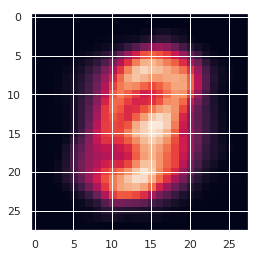

In [167]:
plt.imshow(prob)

In [155]:
trainset[0][0].shape

torch.Size([1, 28, 28])

In [ ]:
train-images-idx3-ubyte